In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import subprocess



In [19]:


def read_results(file_path, columns_suffix=''):
    data = ''
    with open(file_path, 'r') as file:
        data = file.read()
        
    
    file_data_pattern = r"\('(.+)', '(.+)', '(.+)', (-?[\d.]+), ([\d.]+)\)"
    file_data_matches = re.findall(file_data_pattern, data)
    
    columns = ['Filename', 'Benchmark_Satisfiability', 'Post_Transform_Satisfiability', f'Pre_Transform_Solving_Time{columns_suffix}', f'Post_Transform_Solving_Time{columns_suffix}']
    df = pd.DataFrame(file_data_matches, columns=columns)
    
    df[f'Pre_Transform_Solving_Time{columns_suffix}'] = pd.to_numeric(df[f'Pre_Transform_Solving_Time{columns_suffix}'])
    df[f'Post_Transform_Solving_Time{columns_suffix}'] = pd.to_numeric(df[f'Post_Transform_Solving_Time{columns_suffix}'])

    return df



In [20]:
def read_second_transform_results(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    
    # Extract file data
    file_data_pattern = r"\('(.+)', '(.+)', '(.+)', ([\d.]+)\)"
    file_data_matches = re.findall(file_data_pattern, data)
    
    # Create a DataFrame
    columns = ['Filename', 'Benchmark_Satisfiability', 'Post_Transform_Satisfiability', 'Post_Transform_Solving_Time_second']
    df = pd.DataFrame(file_data_matches, columns=columns)
    
    # Convert numeric column
    df['Post_Transform_Solving_Time_second'] = pd.to_numeric(df['Post_Transform_Solving_Time_second'])
    
    return df[['Filename', 'Post_Transform_Solving_Time_second']]


In [16]:
#####DA DAS LAUFEN LASSEN :)

subdepths = [10, 8, 5, 2]
folders = ["LIA"]


sd = 2
folder = "QF_LRA"




path = os.path.join('semantic-fusion-seeds', folder)
command= [
    'python3', 'EquivalentTransformer.py',
    '--dir=' + path,
    '--sub-depth=' + str(sd),
    '--keep-generated-files',
    '--measure-original-solving-time',
    '--solver=z3',
    '--do-shuffling'
    ]
try:
    result = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    print("Command output:", result.stdout)
except subprocess.CalledProcessError as e:
    print("An error occurred while running the command:", e.stderr)

        


Command output: Processed sin-problem-7-weak2-chunk-0040.smt2
Processed cbrt-problem-3-weak-chunk-0049.smt2
Processed sin-problem-8-weak-chunk-0036.smt2
Processed Chua-1-VC2-U-chunk-0156.smt2
Processed bottom-plate-mixer-chunk-0024.smt2
Processed polypaver-bench-exp-3d-chunk-0061.smt2
Processed sin-problem-7-weak-chunk-0057.smt2
Processed atan-problem-2-weak2-chunk-0009.smt2
Processed sin-problem-7-chunk-0013.smt2
Processed Chua-1-IL-L-chunk-0156.smt2
Processed sqrt-1mcosq-7-chunk-0126.smt2
Processed cbrt-problem-3-weak-chunk-0012.smt2
Processed cbrt-problem-3-weak-chunk-0045.smt2
Processed polypaver-bench-exp-3d-chunk-0145.smt2
Processed sin-problem-7-chunk-0048.smt2
Processed cbrt-problem-3-chunk-0074.smt2
Processed cbrt-problem-3-weak-chunk-0068.smt2
Processed Chua-1-VC1-L-chunk-0155.smt2
Processed sin-problem-7-chunk-0049.smt2
Processed log-fun-ineq-g-chunk-0038.smt2
Processed polypaver-bench-exp-3d-chunk-0040.smt2
Processed sqrt-1mcosq-7-chunk-0015.smt2
Processed cbrt-problem-3-we

In [18]:
import pandas as pd



def read_file(filepath):
    data = []
    with open(filepath, 'r') as f:
        next(f)  # Skip the first line
        for line in f:
            try:
                parts = line.strip().strip("()").split(', ')
                filename = parts[0].strip("'")
                status1 = parts[1].strip("'")
                status2 = parts[2].strip("'")
                time1 = float(parts[3])
                time2 = float(parts[4])
                data.append((filename, status1, status2, time1, time2))
            except ValueError as e:
                print(f"Skipping malformed line in {filepath}: {line}")
                print(f"Error: {e}")
    return pd.DataFrame(data, columns=['filename', 'status1', 'status2', 'time1', 'time2'])

def compare_post_transform_times(df1, df2):
    df1['source'] = 'LIA'
    df2['source'] = 'QF_LRA'
    combined_df = pd.concat([df1, df2], ignore_index=True)
    combined_df['time_diff'] = combined_df['time2'] - combined_df['time1']
    return combined_df

def calculate_average_difference(df, subdepth):
    avg_diff = df['time_diff'].mean()
    print(f"Average difference for subdepth {subdepth}: {avg_diff:.6f} seconds")
    return avg_diff

# Define file paths
file_paths = {
    'sd10LIA': 'results/run_26-05-2024__sd10LIA.txt',
    'sd10QF_LRA': 'results/run_26-05-2024__sd10QF_LRA.txt',
    'sd8LIA': 'results/run_26-05-2024__sd8LIA.txt',
    'sd8QF_LRA': 'results/run_26-05-2024__sd8QF_LRA.txt',
    'sd5LIA': 'results/run_26-05-2024__sd5LIA.txt',
    'sd5QF_LRA': 'results/run_26-05-2024__sd5QF_LRA.txt',
    'sd2LIA': 'results/run_26-05-2024__sd2LIA.txt',
    'sd2QF_LRA': 'results/run_26-05-2024__sd2QF_LRA.txt'
}

# Read data
data_sd10LIA = read_file(file_paths['sd10LIA'])
data_sd10QF_LRA = read_file(file_paths['sd10QF_LRA'])
data_sd8LIA = read_file(file_paths['sd8LIA'])
data_sd8QF_LRA = read_file(file_paths['sd8QF_LRA'])
data_sd5LIA = read_file(file_paths['sd5LIA'])
data_sd5QF_LRA = read_file(file_paths['sd5QF_LRA'])
data_sd2LIA = read_file(file_paths['sd2LIA'])
data_sd2QF_LRA = read_file(file_paths['sd2QF_LRA'])

# Compare post-transform times by appending dataframes
comparison_sd10 = compare_post_transform_times(data_sd10LIA, data_sd10QF_LRA)
comparison_sd8 = compare_post_transform_times(data_sd8LIA, data_sd8QF_LRA)
comparison_sd5 = compare_post_transform_times(data_sd5LIA, data_sd5QF_LRA)
comparison_sd2 = compare_post_transform_times(data_sd2LIA, data_sd2QF_LRA)

# Calculate and print average differences
avg_diff_sd10 = calculate_average_difference(comparison_sd10, 10)
avg_diff_sd8 = calculate_average_difference(comparison_sd8, 8)
avg_diff_sd5 = calculate_average_difference(comparison_sd5, 5)
avg_diff_sd2 = calculate_average_difference(comparison_sd2, 2)




Average difference for subdepth 10: 0.000002 seconds
Average difference for subdepth 8: -0.000480 seconds
Average difference for subdepth 5: -0.000504 seconds
Average difference for subdepth 2: 0.000418 seconds


In [16]:


folders = ["AUFLIA", "AUFNIRA", "LIA", "LRA", "QF_ABV", "QF_AUFLIA", "QF_AX", "QF_LRA"]

folder = "LIA"
path_to_first_query = os.path.join('semantic-fusion-seeds', folder)
path_to_second_query = os.path.join('generated', 'semantic-fusion-seeds', folder)

command1= [
    'python3', 'EquivalentTransformer.py',
    '--dir=' + path_to_first_query,
    '--sub-depth=10',
    '--keep-generated-files',
    '--measure-original-solving-time',
    '--solver=z3',
    '--do-shuffling'
]

print(command1)
command2= [
    'python3', 'WeakenStrengthenTransformer.py',
    '--dir=' + path_to_second_query,
    '--subdepth=10',
    '--keep-generated-files',
    '--measure-original-solving-time',
    '--solver=z3',
    '--do-shuffling'
]

try:
    result = subprocess.run(command1, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    print("Command output:", result.stdout)
except subprocess.CalledProcessError as e:
    print("An error occurred while running the command:", e.stderr)

try:
    result = subprocess.run(command2, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    print("Command output:", result.stdout)
except subprocess.CalledProcessError as e:
    print("An error occurred while running the command:", e.stderr)









['python3', 'EquivalentTransformer.py', '--dir=semantic-fusion-seeds/QF_LRA', '--sub-depth=10', '--keep-generated-files', '--measure-original-solving-time', '--solver=cvc5', '--do-shuffling']


KeyboardInterrupt: 

In [27]:


testSet = 'LIA'

pathToFirstResult = f'results/run_25-05-2024__{testSet}.txt'
pathToSecondResult =  f'results/weakenedStrengthened/run_25-05-2024__{testSet}.txt'


df_first_transform = read_results(pathToFirstResult)
df_second_transform = read_second_transform_results(pathToSecondResult)

merged_df = pd.merge(df_first_transform, df_second_transform, on='Filename', suffixes=('','_second'))
filename = f'merged_data_{testSet}.csv'
merged_df.to_csv(filename, index=False)


In [32]:
csv_files = ["merged_data_CVC5__LIA.csv", "merged_data_CVC5__QF_ABV.csv", "merged_data_CVC5__QF_AUFLIA.csv", "merged_data_CVC5__QF_LRA.csv"]  # Add your file names here

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through the list of CSV files and read each one into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate all DataFrames
concatenated_df = pd.concat(dataframes, ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv("concatenated_file_CVC5.csv", index=False)

In [2]:

file_path = "analysis/cvc5_time-analyses.csv"  # Update this with the path to your CSV file
df = pd.read_csv(file_path)

# Rename the columns
df.rename(columns={df.columns[1]: 'post_equiv_transform_sat', df.columns[2]: 'post_weaken_strenghten_sat'}, inplace=True)

# Save the modified CSV to a new file
df.to_csv("z3_time-analyses_fin.csv", index=False)

print("Columns renamed and file saved successfully!")

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/cvc5_time-analyses.csv'

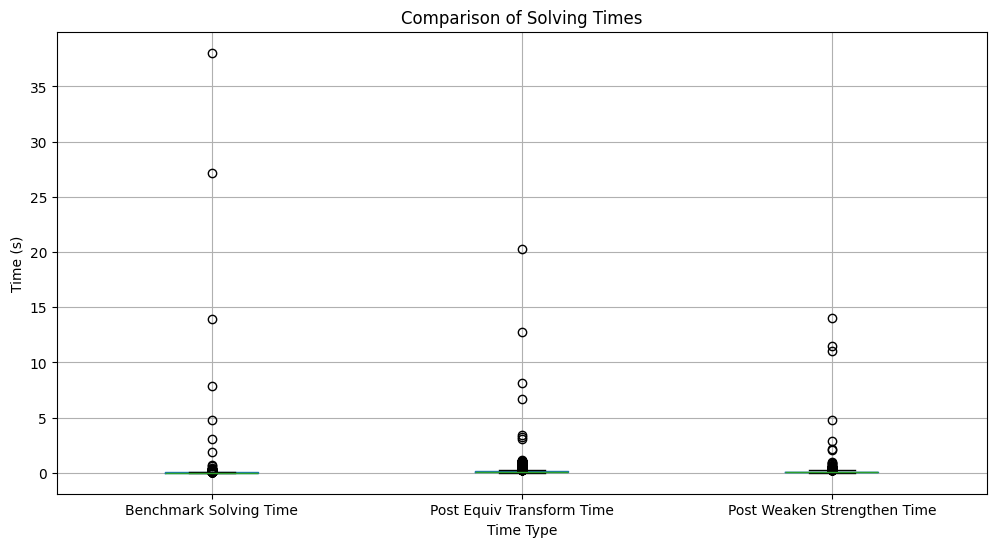

In [7]:
import numpy as np


file_path = "analysis/cvc5_time-analyses_fin.csv"  # Update this with the path to your CSV file
df = pd.read_csv(file_path, header=None)


benchmark_solving_time = pd.to_numeric(df[df.columns[3]], errors='coerce')
post_equiv_transform_time = pd.to_numeric(df[df.columns[4]], errors='coerce')
post_weaken_strenghten_time = pd.to_numeric(df[df.columns[5]], errors='coerce')

# Combine the data into a single DataFrame for plotting
data = {
    'Benchmark Solving Time': benchmark_solving_time,
    'Post Equiv Transform Time': post_equiv_transform_time,
    'Post Weaken Strengthen Time': post_weaken_strenghten_time
}
df_plot = pd.DataFrame(data)

# Drop any rows with NaN values (which result from non-numeric conversion)
df_plot.dropna(inplace=True)

# Create the box plot
plt.figure(figsize=(12, 6))
df_plot.boxplot()

plt.xlabel('Time Type')
plt.ylabel('Time (s)')
plt.title('Comparison of Solving Times')
plt.grid(True)

# Show the plot
plt.show()


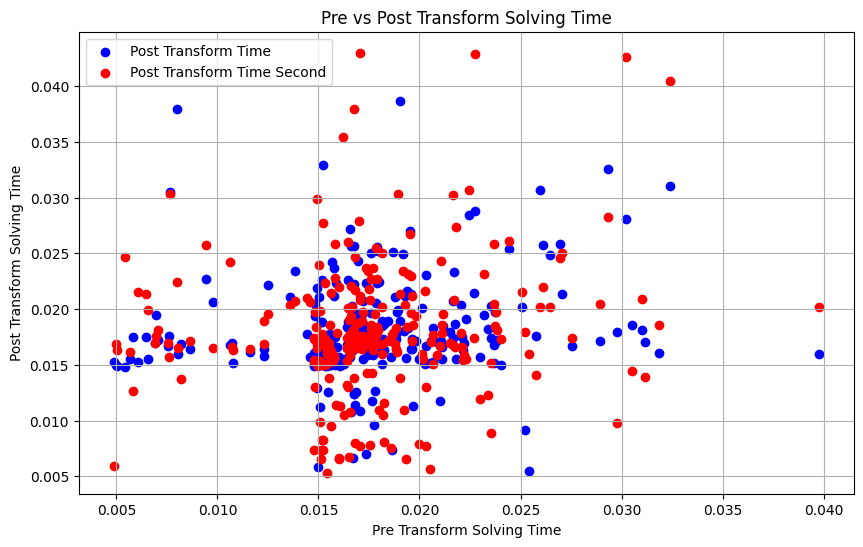

In [37]:
plt.figure(figsize=(10, 6))

# Scatter plot for Pre vs Post Transform Solving Time
plt.scatter(merged_df['Pre_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time'], color='blue', label='Post Transform Time')
plt.scatter(merged_df['Pre_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time_second'], color='red', label='Post Transform Time Second')

plt.xlabel('Pre Transform Solving Time')
plt.ylabel('Post Transform Solving Time')
plt.title('Pre vs Post Transform Solving Time')
plt.legend()
plt.grid(True)
plt.show()



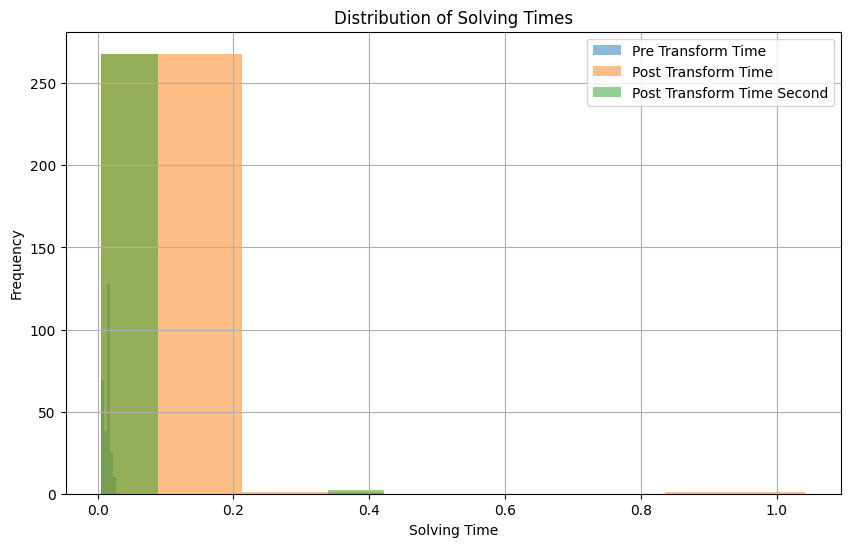

In [ ]:
# Histogram of Pre-Transform Solving Times
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Pre_Transform_Solving_Time'], bins=5, alpha=0.5, label='Pre Transform Time')
plt.hist(merged_df['Post_Transform_Solving_Time'], bins=5, alpha=0.5, label='Post Transform Time')
plt.hist(merged_df['Post_Transform_Solving_Time_second'], bins=5, alpha=0.5, label='Post Transform Time Second')

plt.xlabel('Solving Time')
plt.ylabel('Frequency')
plt.title('Distribution of Solving Times')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/b6/_r8bzmsd0ylc7nrw43w2dk2h0000gn/T/ipykernel_40128/983858081.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([merged_df['Pre_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time_second']], labels=['Pre Transform', 'Post Transform', 'Post Transform Second'])


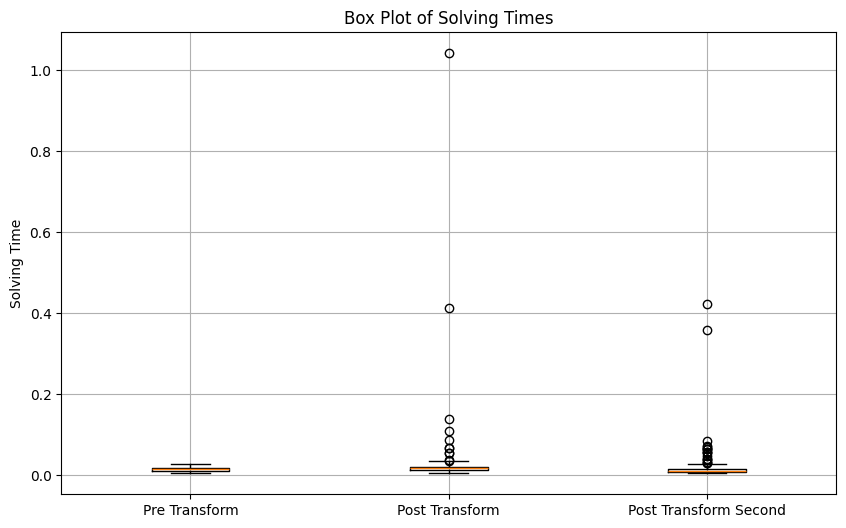

In [ ]:
# Box Plot for Solving Times
plt.figure(figsize=(10, 6))
plt.boxplot([merged_df['Pre_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time'], merged_df['Post_Transform_Solving_Time_second']], labels=['Pre Transform', 'Post Transform', 'Post Transform Second'])

plt.ylabel('Solving Time')
plt.title('Box Plot of Solving Times')
plt.grid(True)
plt.show()